In [1]:
# import required modules

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [2]:
##  choose the data you need to import from a website 

url='https://www.flipkart.com/search?q=i%20phones&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'


In [3]:
df=pd.DataFrame(columns= ['prod name','prod link','Star Rating','Number Of Ratings','Number Of Reviews','Sale Price','mrp'])

#df.columns=['prod_name','ratings','total_rating','review','price','mrp']
for i in range(1,6):
    page=url+"&page="+str(i)
    data=requests.get(page)
    soup=bs(data.content,"html.parser")
    
    prod_name=[]
    ratings=[]
    no_of_rate=[]
    review=[]
    prices=[]
    mrp=[]
    prod_link=[]

    name=soup.find_all('div',class_='_4rR01T')
    #print(name)
    prod_name=[i.text for i in name]
    rate=soup.find_all('div',class_='_3LWZlK')
    ratings=[i.text for i in rate]
    nfrate=soup.find_all('span',class_='_2_R_DZ')
    no_of_rate=[i.text.split(' ')[0] for i in nfrate]
    review=[i.text.split('&')[1] for i in nfrate]
    price=soup.find_all('div',class_='_30jeq3 _1_WHN1')
    prices=[i.text for i in price]
    actual_p=soup.find_all('div',class_='_3I9_wc _27UcVY')
    mrp=[i.text for i in actual_p]
    product_links = soup.find_all("a", class_="_1fQZEK")
    prod_link = [link.get("href") for link in product_links]
    
    
    min_len=min(len(prod_name),len(ratings),len(no_of_rate),len(review),len(prices),len(mrp),len(prod_link))

    prod_name1=[]
    ratings1=[]
    no_of_rate1=[]
    review1=[]
    prices1=[]
    mrp1=[]
    prod_link1=[]
    for i in range(min_len):
        prod_name1.append(prod_name[i])
        ratings1.append(ratings[i])
        no_of_rate1.append(no_of_rate[i])
        review1.append(review[i])
        prices1.append(prices[i])
        mrp1.append(mrp[i])
        prod_link1.append(prod_link[i])
        
    df1=pd.DataFrame({'prod name':prod_name1,'prod link':prod_link1,'Star Rating':ratings1,'Number Of Ratings':no_of_rate1,'Number Of Reviews':review1,'Sale Price':prices1,'mrp':mrp1})
    
    df=pd.concat([df,df1],axis=0)

In [4]:
df.columns

Index(['prod name', 'prod link', 'Star Rating', 'Number Of Ratings',
       'Number Of Reviews', 'Sale Price', 'mrp'],
      dtype='object')

In [5]:
df.columns= [ '_'.join(i.split(' ')) for i in df.columns]

In [6]:
df.columns

Index(['prod_name', 'prod_link', 'Star_Rating', 'Number_Of_Ratings',
       'Number_Of_Reviews', 'Sale_Price', 'mrp'],
      dtype='object')

In [7]:

df['Number_Of_Reviews']=df['Number_Of_Reviews'].str[:-7]
df['prod_link']=df['prod_link'].str.split('&').str[0]
df['prod_link']='https://www.flipkart.com'+df['prod_link']

In [8]:
# droping null values from df

df=df.dropna()

In [9]:
df

,prod_name,prod_link,Star_Rating,Number_Of_Ratings,Number_Of_Reviews,Sale_Price,mrp
0,"APPLE iPhone 13 (Midnight, 128 GB)",https://www.flipkart.com/apple-iphone-13-midni...,4.7,"2,31,485","11,854","₹62,499","₹69,900"
1,"APPLE iPhone 13 (Pink, 128 GB)",https://www.flipkart.com/apple-iphone-13-pink-...,4.7,"2,31,485","11,854","₹62,499","₹69,900"
2,"APPLE iPhone 13 (Starlight, 128 GB)",https://www.flipkart.com/apple-iphone-13-starl...,4.7,"2,31,485","11,854","₹62,499","₹69,900"
3,"APPLE iPhone 13 (Blue, 128 GB)",https://www.flipkart.com/apple-iphone-13-blue-...,4.7,"2,31,485","11,854","₹62,499","₹69,900"
4,"APPLE iPhone 13 (Green, 128 GB)",https://www.flipkart.com/apple-iphone-13-green...,4.7,"2,31,485","11,854","₹63,499","₹69,900"
...,...,...,...,...,...,...,...
10,"APPLE iPhone 5s (Silver, 16 GB)",https://www.flipkart.com/apple-iphone-5s-silve...,4.4,"62,770","7,342","₹25,000","₹94,900"
11,"APPLE iPhone 13 (Starlight, 512 GB)",https://www.flipkart.com/apple-iphone-13-starl...,4.7,"2,31,485","12,278","₹85,999","₹52,000"
12,"APPLE iPhone 14 Pro Max (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-14-pro-m...,4.6,"1,627",121,"₹1,37,999","₹1,09,900"
13,"APPLE iPhone 13 mini (Pink, 512 GB)",https://www.flipkart.com/apple-iphone-13-mini-...,4.5,"3,406",297,"₹89,999","₹1,24,900"


In [10]:
df['Star_Rating']=df['Star_Rating'].astype('float')

In [12]:
df['Number_Of_Reviews']=df['Number_Of_Reviews'].str.replace(',','').astype('int')

In [18]:
df['Number_Of_Ratings']=df['Number_Of_Ratings'].str.replace(',','').astype('int')

In [15]:
df['Sale_Price']=df['Sale_Price'].str[1:].str.replace(',','').astype('int')

In [16]:
df['mrp']=df['mrp'].str[1:].str.replace(',','').astype('int')

In [19]:
df.dtypes

prod_name             object
prod_link             object
Star_Rating          float64
Number_Of_Ratings      int32
Number_Of_Reviews      int32
Sale_Price             int32
mrp                    int32
dtype: object

Text(0.5, 1.0, 'Distribution of Customer Ratings')

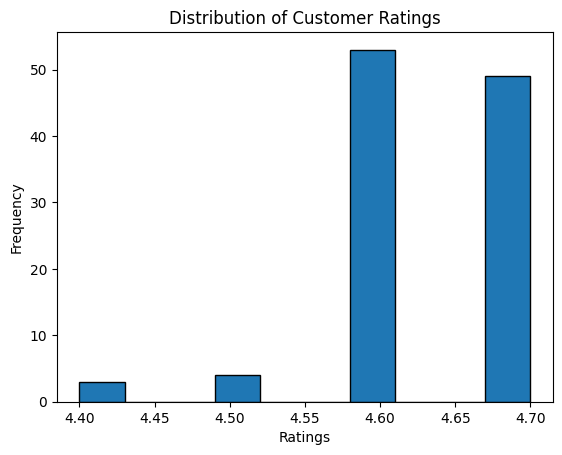

In [20]:
# It is the distribution of product ratings. This provides insights into the popularity and satisfaction level of the products.


df['Star_Rating'].plot.hist(bins=10, edgecolor='black')
mpl.pyplot.xlabel('Ratings')
mpl.pyplot.ylabel('Frequency')
mpl.pyplot.title('Distribution of Customer Ratings')

In [21]:
#  Explored the distribution of customer ratings and identified popular products

df['prod_name'].value_counts().head(10)

APPLE iPhone 14 Plus (Midnight, 256 GB)     2
APPLE iPhone 14 Pro (Gold, 128 GB)          1
APPLE iPhone 14 Pro Max (Gold, 512 GB)      1
APPLE iPhone 13 Pro Max (Silver, 512 GB)    1
APPLE iPhone 14 (Midnight, 256 GB)          1
APPLE iPhone 11 (Black, 64 GB)              1
APPLE iPhone 13 Pro Max (Silver, 256 GB)    1
APPLE iPhone 12 (Black, 128 GB)             1
APPLE iPhone 13 Pro (Gold, 256 GB)          1
APPLE iPhone 14 (Starlight, 128 GB)         1
Name: prod_name, dtype: int64

In [22]:
#  create a new column in the dataframe "Discount_Percentage" based on MRP and sale value

df['Discount']=(df['mrp']-df['Sale_Price'])*100.0/df['mrp']

In [23]:
# maximum discount available on which product

df.loc[df['Discount']==df['Discount'].max(),:]

,prod_name,prod_link,Star_Rating,Number_Of_Ratings,Number_Of_Reviews,Sale_Price,mrp,Discount
14,"APPLE iPhone 5s (Space Grey, 16 GB)",https://www.flipkart.com/apple-iphone-5s-space...,4.4,62770,7342,25000,169900,85.285462


In [24]:
#  find total no of models  each space configuration (128 GB , 64 GB etc)

df['Rom']=df['prod_name'].str.split(',').str[1].str[:-3].str.strip()
df[(df['Rom']=='64') | (df['Rom']=='128')]['Rom'].value_counts()

128    31
64     11
Name: Rom, dtype: int64

In [25]:
#  find total number of models for each color

df['color']=df['prod_name'].str.split('(').str[1].str.split(',').str[0]
df['color'].value_counts()

Silver          12
Gold            11
Midnight        10
Starlight        9
Blue             9
                 8
Green            7
Space Black      6
Space Grey       5
Purple           5
Black            5
Yellow           4
Red              3
White            3
Deep Purple      3
Graphite         3
Sierra Blue      2
Alpine Green     2
Pink             2
Name: color, dtype: int64

In [26]:
#   find total number of models by iphone version

df['iphone_ver']=df['prod_name'].str.split('(').str[0].str[6:]
df['iphone_ver'].value_counts()

iPhone 14 Plus        16
iPhone 14             16
iPhone 14 Pro         13
iPhone 13             13
iPhone 13 Pro Max     10
iPhone 14 Pro Max      9
iPhone 12              9
iPhone 11              8
iPhone 13 Pro          6
iPhone 13 mini         3
iPhone 5s              2
iPhone 8               1
iPhone 6               1
iPhone 11 Pro Max      1
iPhone 8 Plus          1
Name: iphone_ver, dtype: int64

In [27]:
#   list top 5 models having highest no of reviews

df.sort_values('Number_Of_Reviews',ascending=False).head()

,prod_name,prod_link,Star_Rating,Number_Of_Ratings,Number_Of_Reviews,Sale_Price,mrp,Discount,Rom,color,iphone_ver
2,"APPLE iPhone 6 (Space Grey, 32 GB)",https://www.flipkart.com/apple-iphone-6-space-...,4.4,145620,16235,30780,31900,3.510972,32,Space Grey,iPhone 6
1,"APPLE iPhone 12 (White, 64 GB)",https://www.flipkart.com/apple-iphone-12-white...,4.6,189813,12872,53999,59900,9.851419,64,White,iPhone 12
18,"APPLE iPhone 12 (Red, 128 GB)",https://www.flipkart.com/apple-iphone-12-red-1...,4.6,189813,12872,57999,64900,10.633282,128,Red,iPhone 12
3,"APPLE iPhone 12 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-12-black...,4.6,189813,12872,53999,59900,9.851419,64,Black,iPhone 12
7,"APPLE iPhone 12 (Black, 128 GB)",https://www.flipkart.com/apple-iphone-12-black...,4.6,189813,12872,57999,94900,38.884089,128,Black,iPhone 12


In [28]:
#   find total no of reviews for iphone 11 and iphone 12 category

df['iphone_cat']=df['iphone_ver'].str.split(' ').str[1]
df['iphone_cat']='iphone' +df['iphone_cat']
df[(df['iphone_cat']=='iphone11') | (df['iphone_cat']=='iphone12')].groupby(['iphone_cat']).agg({'Number_Of_Reviews':'sum'})

,Number_Of_Reviews
iphone_cat,
iphone11,90901
iphone12,115818


In [29]:
##  which iphone has 3rd highest MRP

df[df['mrp']== df['mrp'].sort_values(ascending=False).unique()[2]]

,prod_name,prod_link,Star_Rating,Number_Of_Ratings,Number_Of_Reviews,Sale_Price,mrp,Discount,Rom,color,iphone_ver,iphone_cat
3,"APPLE iPhone 13 Pro Max (Alpine Green, 512 GB)",https://www.flipkart.com/apple-iphone-13-pro-m...,4.6,1902,186,134999,159900,15.572858,512,Alpine Green,iPhone 13 Pro Max,iphone13
12,"APPLE iPhone 13 Pro Max (Sierra Blue, 512 GB)",https://www.flipkart.com/apple-iphone-13-pro-m...,4.6,1902,186,134999,159900,15.572858,512,Sierra Blue,iPhone 13 Pro Max,iphone13
17,"APPLE iPhone 14 Pro (Gold, 512 GB)",https://www.flipkart.com/apple-iphone-14-pro-g...,4.7,1428,112,149999,159900,6.191995,512,Gold,iPhone 14 Pro,iphone14
21,"APPLE iPhone 14 Pro (Space Black, 512 GB)",https://www.flipkart.com/apple-iphone-14-pro-s...,4.7,1428,112,149999,159900,6.191995,512,Space Black,iPhone 14 Pro,iphone14
22,"APPLE iPhone 13 Pro Max (Silver, 512 GB)",https://www.flipkart.com/apple-iphone-13-pro-m...,4.6,1902,186,134999,159900,15.572858,512,Silver,iPhone 13 Pro Max,iphone13
23,"APPLE iPhone 14 Pro (Silver, 512 GB)",https://www.flipkart.com/apple-iphone-14-pro-s...,4.7,1428,112,149999,159900,6.191995,512,Silver,iPhone 14 Pro,iphone14
10,"APPLE iPhone 13 mini ((PRODUCT)RED, 512 GB)",https://www.flipkart.com/apple-iphone-13-mini-...,4.5,3406,295,89999,159900,43.715447,512,,iPhone 13 mini,iphone13
1,"APPLE iPhone 13 Pro Max (Graphite, 512 GB)",https://www.flipkart.com/apple-iphone-13-pro-m...,4.6,1902,186,134999,159900,15.572858,512,Graphite,iPhone 13 Pro Max,iphone13


<AxesSubplot:xlabel='iphone_cat'>

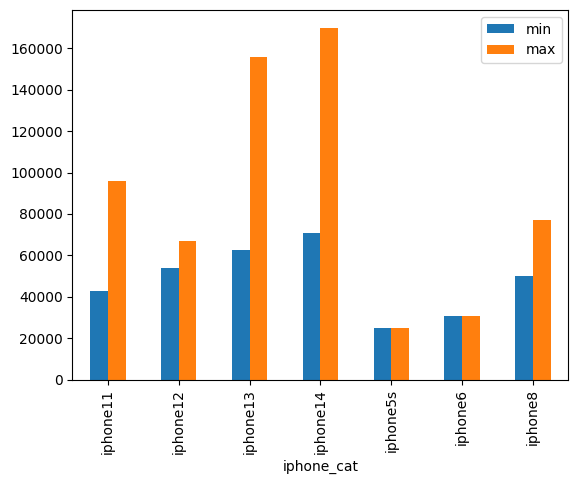

In [30]:
##  minimum and maximum prices of each iphone category

group_data=df.groupby('iphone_cat')['Sale_Price'].agg(['min','max'])
group_data.plot(kind='bar')

Text(0.5, 1.0, 'Top Brands by Product Availability')

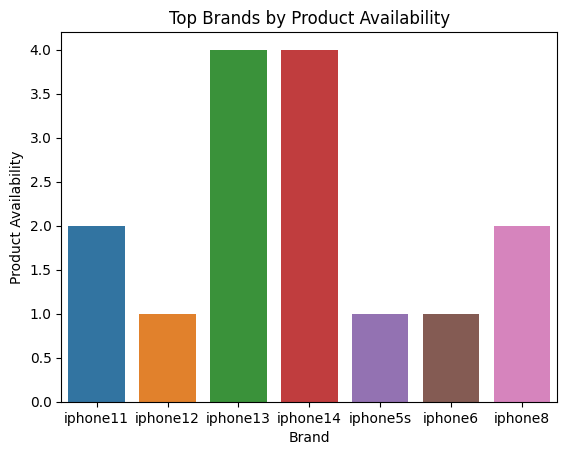

In [31]:
#Analyze the data to identify the top brands in terms of product availability 


brand_ava=df.groupby('iphone_cat')['iphone_ver'].nunique()

sns.barplot(x=brand_ava.index, y=brand_ava.values)
mpl.pyplot.xlabel('Brand')
mpl.pyplot.ylabel('Product Availability')
mpl.pyplot.title('Top Brands by Product Availability')

Text(0.5, 1.0, 'Relationship between Ratings and Prices')

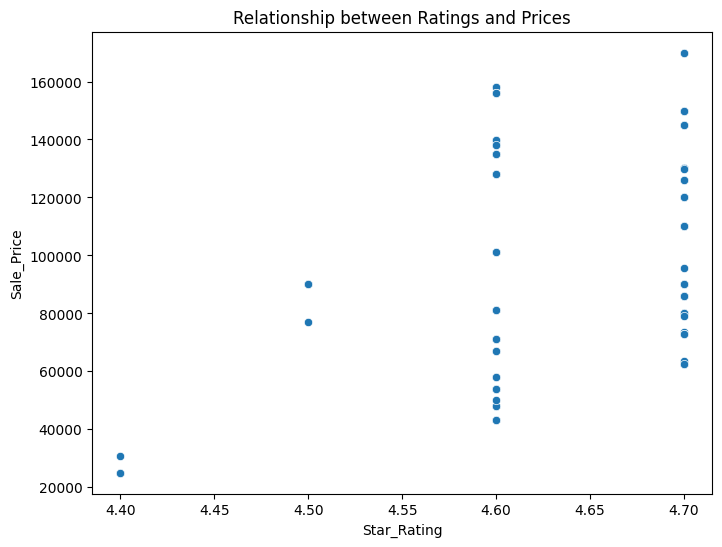

In [33]:
##  Analysis to understand the relationship between ratings and price.

df1=df[['Sale_Price','Star_Rating']]


# Create a scatter plot of ratings vs prices
mpl.pyplot.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Star_Rating', y='Sale_Price')
mpl.pyplot.xlabel('Star_Rating')
mpl.pyplot.ylabel('Sale_Price')
mpl.pyplot.title('Relationship between Ratings and Prices')



In [69]:
df.columns

Index(['prod_name', 'prod_link', 'Star_Rating', 'Number Of Ratings',
       'Number Of Reviews', 'Sale Price', 'mrp', 'Discount', 'Rom', 'color',
       'iphone_ver', 'iphone_cat'],
      dtype='object')

In [34]:
## top selling product based on customer ratings and discount provided by flipkart: APPLE iPhone 13 (Blue, 512 GB)

df.sort_values(['Star_Rating','Discount'],ascending=[False,False]).head()

,prod_name,prod_link,Star_Rating,Number_Of_Ratings,Number_Of_Reviews,Sale_Price,mrp,Discount,Rom,color,iphone_ver,iphone_cat
21,"APPLE iPhone 13 (Green, 512 GB)",https://www.flipkart.com/apple-iphone-13-green...,4.7,231485,11854,85999,169900,49.382578,512,Green,iPhone 13,iphone13
15,"APPLE iPhone 13 Pro (Silver, 512 GB)",https://www.flipkart.com/apple-iphone-13-pro-s...,4.7,1472,122,125999,179900,29.961645,512,Silver,iPhone 13 Pro,iphone13
6,"APPLE iPhone 13 ((PRODUCT)RED, 128 GB)",https://www.flipkart.com/apple-iphone-13-produ...,4.7,231485,11854,62499,74900,16.556742,128,,iPhone 13,iphone13
8,"APPLE iPhone 13 Pro (Graphite, 1 TB)",https://www.flipkart.com/apple-iphone-13-pro-g...,4.7,1472,122,144999,169900,14.656268,1,Graphite,iPhone 13 Pro,iphone13
5,"APPLE iPhone 13 Pro (Sierra Blue, 1 TB)",https://www.flipkart.com/apple-iphone-13-pro-s...,4.7,1472,122,144999,169900,14.656268,1,Sierra Blue,iPhone 13 Pro,iphone13
